✅ Loaded metrics.csv


,model,acc,f1,auc
3,mlp,0.93575,0.93575,0.996469
4,xgb,0.93200,0.93200,0.996584
0,knn,0.91725,0.91725,0.977677
2,rf,0.91200,0.91200,0.993551
1,logreg,0.90025,0.90025,0.990120


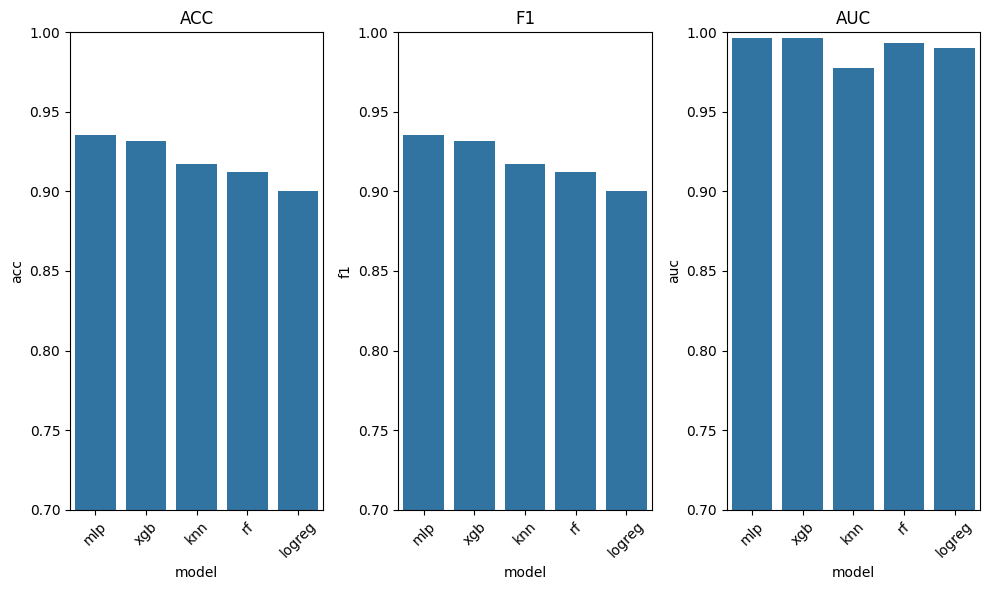

⚠️ Confusion matrix for model 'mlp' not found.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob

# Load results
results_path = Path("../results/metrics.csv")
assert results_path.exists(), "metrics.csv not found. Run train.py first."

df = pd.read_csv(results_path)
print("✅ Loaded metrics.csv")
df = df.sort_values("acc", ascending=False)

display(df)

# Bar plot of Accuracy, F1, AUC
plt.figure(figsize=(10, 6))
metrics = ["acc", "f1", "auc"]
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(data=df, x="model", y=metric)
    plt.title(metric.upper())
    plt.ylim(0.7, 1.0)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show best confusion matrix
from IPython.display import Image, display
best_model = df.iloc[0]["model"]
image_path = Path(f"results/figures/confmat_{best_model}.png")
if image_path.exists():
    display(Image(filename=str(image_path)))
else:
    print(f"⚠️ Confusion matrix for model '{best_model}' not found.")
